In [1]:
%matplotlib inline
import quantstats_custom as qs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set() # make charts look cool
qs.extend_pandas() # extend pandas functionality with metrics, etc.

#helper functions
def vdir(obj):
    return [x for x in dir(obj) if not x.startswith('_')]
def gmean(df,axis=0):
    return np.exp(np.log((1+df/100).prod(axis=axis))/df.notna().sum(axis))-1

In [2]:
rois = pd.read_csv('rois.csv')
apys = pd.read_csv('apys.csv')

,ROIactual,ROIadvertised,bucket_min,bucket_max,total_freq
0,1,0,-54.2000,-52.8062,1
1,1,0,-52.8062,-51.4124,1
38,4,4,-1.2356,0.1582,8
39,3,3,0.1582,1.5520,6
40,1,3,1.5520,2.9458,4
43,7,7,5.7334,7.1272,14
44,2,2,7.1272,8.5210,4
46,1,1,9.9148,11.3086,2
47,1,1,11.3086,12.7024,2
48,2,2,12.7024,14.0962,4


C:\Users\Mihai\AppData\Local\Temp/ipykernel_25196/1237798401.py:14: RuntimeWarning: divide by zero encountered in log
  return np.exp(np.log((1+df/100).prod(axis=axis))/df.notna().sum(axis))-1


,APYactual,APYadvertised,bucket_min,bucket_max,total_freq
0,2,0,-100.0,-99.1,2
2,5,5,0.0,10.0,10
3,1,3,10.0,100.0,4
4,9,9,100.0,1000.0,18
5,7,7,1000.0,10000.0,14
6,1,1,10000.0,100000.0,2


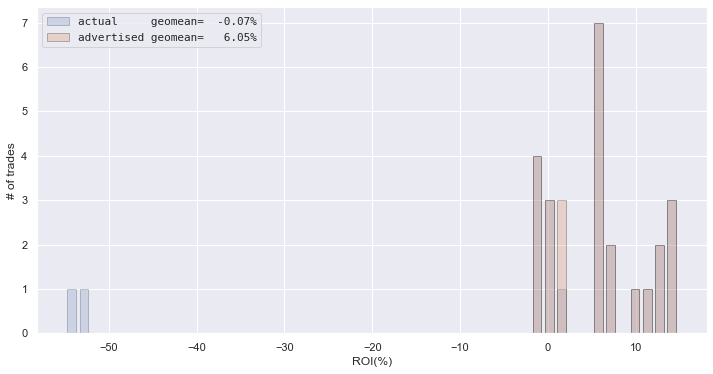

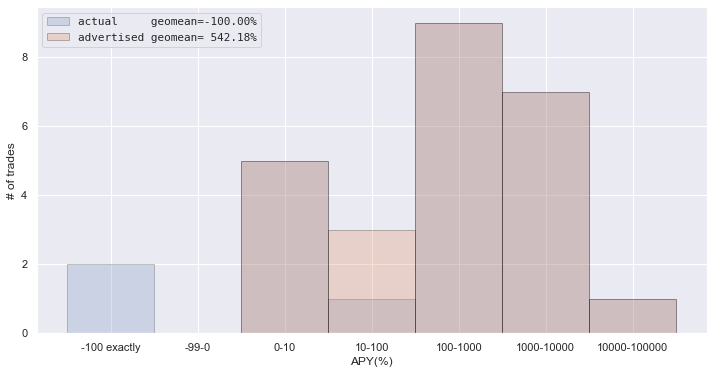

In [42]:
for name,df in {'ROIs':rois,'APYs':apys}.items():
    ax=plt.figure(figsize=(12,6))
    labelFormat = '{:10s} geomean={:8.2%}'
    cols = df.columns
    bins = 50 if name=='ROIs' else [-100,-99.1,0]+(10**np.arange(1,6,1)).tolist()
    counts1, bins = np.histogram(df.loc[:,cols[1]],bins=bins)
    if name == 'ROIs':
        xdata = bins[:-1]
    else:
        xdata = range(len(bins)-1)
        xdatalabels = ['{:.0f} exactly'.format(bins[i]) if bins[i+1]-bins[i]<1 else '{:.0f}-{:.0f}'.format(bins[i],bins[i+1]) for i in range(0,len(bins)-1)]
    plt.bar(xdata,counts1,label=labelFormat.format(cols[1],gmean(df.loc[:,cols[1]])),alpha=0.2,width=1,edgecolor='black')
    if name != 'ROIs':
        plt.gca().set_xticks(xdata)
        plt.gca().set_xticklabels(xdatalabels)
    counts2, bins = np.histogram(df.loc[:,cols[0]],bins=bins)
    plt.bar(xdata,counts2,label=labelFormat.format(cols[0],gmean(df.loc[:,cols[0]])),alpha=0.25,width=1,edgecolor='black')
    if name != 'ROIs':
        plt.gca().set_xticks(xdata)
        plt.gca().set_xticklabels(xdatalabels)
    res = pd.DataFrame(data=[counts1,counts2]).T
    res.columns = [name[:-1]+cols[1],name[:-1]+cols[0]]
    res['bucket_min'] = bins[:-1]
    res['bucket_max'] = bins[1:]
    res['total_freq'] = res.iloc[:,0]+res.iloc[:,1]
    display(res.loc[res.total_freq>0,:])
    plt.legend(prop={'family' : 'monospace'})
    plt.xlabel(name[:-1]+'(%)')
    plt.ylabel('# of trades')
plt.show()